In [ ]:
import pandas as pd
import json
import gzip
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from urllib.request import urlopen
import re
import string
import math
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import seaborn as sb

In [ ]:
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/All_Beauty_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Appliances_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Digital_Music_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Gift_Cards_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Gift_Cards_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Luxury_Beauty_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Magazine_Subscriptions_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Musical_Instruments_5.json.gz
!wget --no-check-certificate  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz


--2022-11-27 17:16:53--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 287013 (280K) [application/x-gzip]
Saving to: ‘AMAZON_FASHION_5.json.gz’

AMAZON_FASHION_5.js 100%[===================>] 280.29K  1013KB/s    in 0.3s    

2022-11-27 17:16:53 (1013 KB/s) - ‘AMAZON_FASHION_5.json.gz’ saved [287013/287013]

--2022-11-27 17:16:53--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/All_Beauty_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 633507 (619K) [application/x-

In [ ]:
data = []
files=[x for x in os.listdir() if x[-3:]=='.gz']
for i in files:
  with gzip.open(i) as f:
    for l in f:
        data.append(json.loads(l.strip()))

In [ ]:
df = pd.DataFrame.from_dict(data)
print(len(df))

464325


In [ ]:
display(df)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN
1,5.0,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,NaN,NaN
2,1.0,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,NaN,NaN
3,5.0,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN
4,5.0,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
464320,5.0,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Green Gl...",Amazon Customer,Perfect fit!,Five Stars,1530489600,NaN,NaN
464321,5.0,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,"{'Size:': ' 5 B(M) US', 'Color:': ' Wolf Grey/...",J. Avila,My favorite cross trainers!,Comfortable,1530144000,NaN,NaN
464322,5.0,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,"{'Size:': ' 8 B(M) US', 'Color:': ' Blue Tint/...",Amazon Customer,Love them fit perfect,Five Stars,1529884800,NaN,NaN
464323,5.0,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,"{'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/...",Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,NaN,NaN


In [ ]:
df.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             150766
reviewerName          39
reviewText           248
summary              115
unixReviewTime         0
vote              407803
image             458521
dtype: int64

In [ ]:
#df = df[df['reviewerName'].notna()]
df = df[df['reviewText'].notna()]
#df = df[df['summary'].notna()]
df.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             150726
reviewerName          39
reviewText             0
summary               90
unixReviewTime         0
vote              407560
image             458297
dtype: int64

In [ ]:
df['overall'].value_counts()

5.0    336101
4.0     74319
3.0     29438
1.0     12617
2.0     11602
Name: overall, dtype: int64

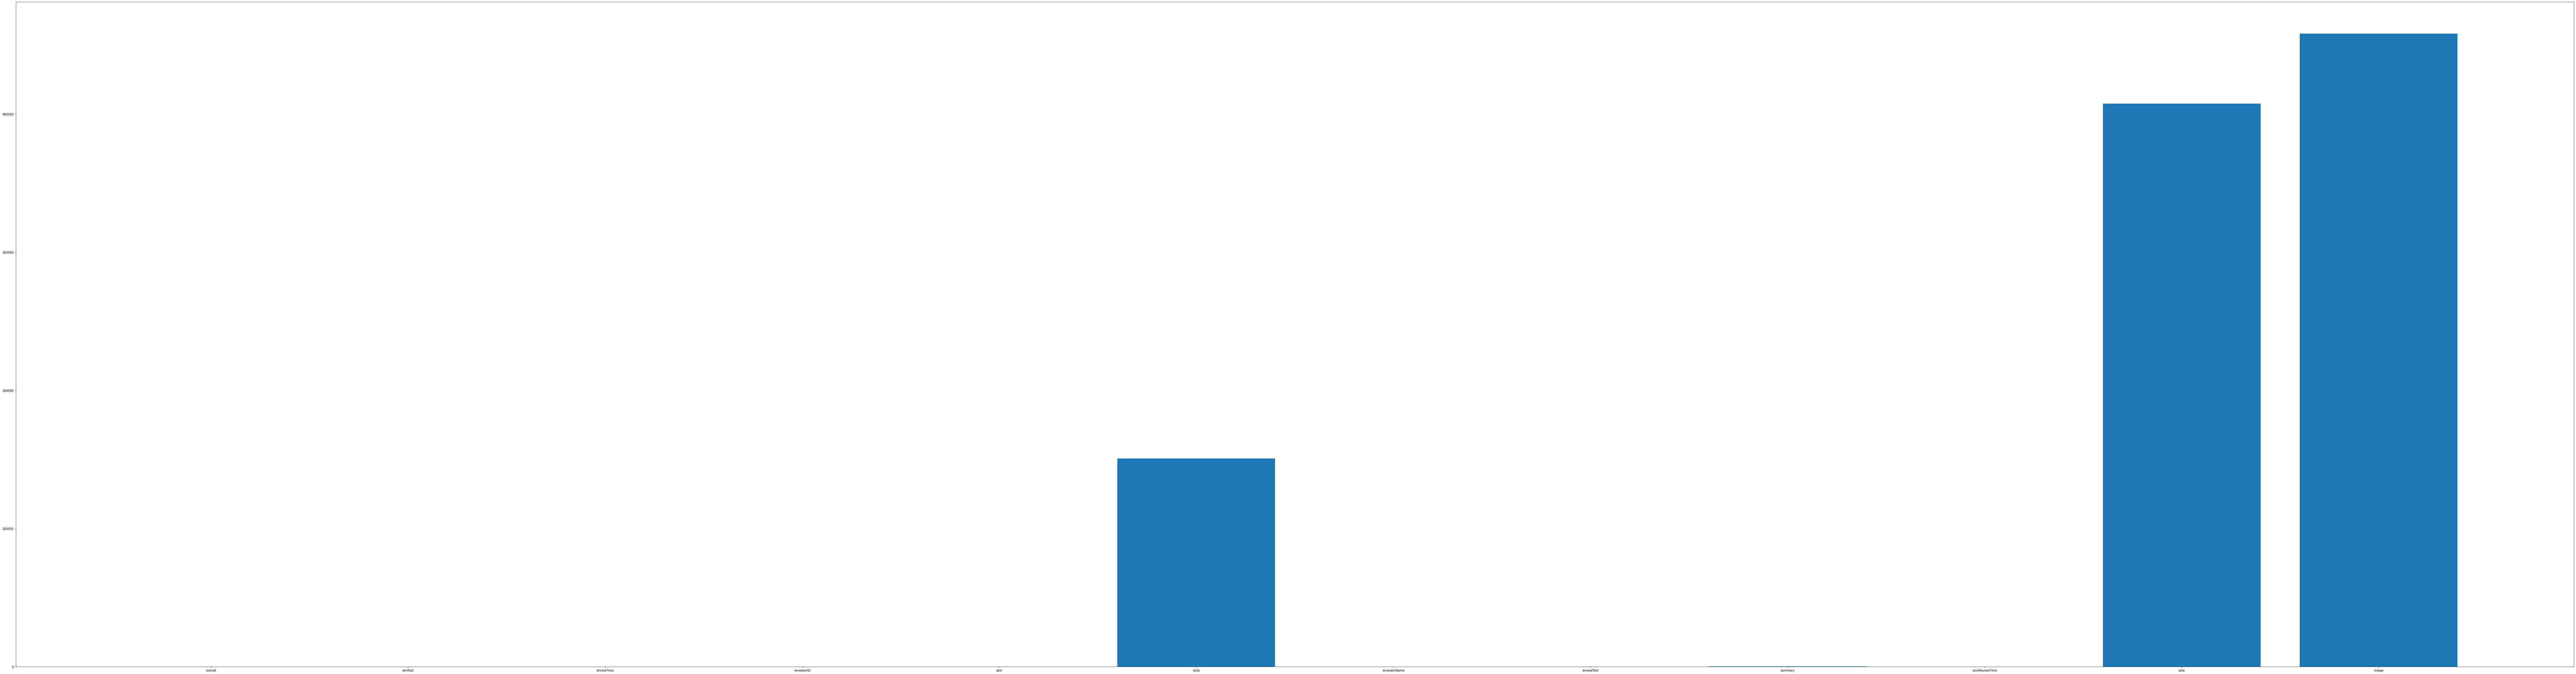

In [ ]:
n_values=df.isnull().sum() #storing the number of null values in a list
fig = plt.figure(figsize =(150,40)) #changing the figure size
plt.bar(df.columns,n_values) #plotting the graph
plt.show() #displaying the graph

In [ ]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviewText']=df['reviewText'].apply(lambda x:expand_contractions(x))

In [ ]:
df['reviewText']=df['reviewText'].apply(lambda x: x.lower()) #models treat words like Apple and apple differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words.
df['reviewText']=df['reviewText'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) #Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis.
df['reviewText']=df['reviewText'].apply(lambda x: re.sub(' +',' ',x)) #removing extra spaces between words


In [ ]:
#df['summary']=df['summary'].apply(lambda x: x.lower()) #models treat words like Apple and apple differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words.
#df['summary']=df['summary'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) #Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis.
#df['summary']=df['summary'].apply(lambda x: re.sub(' +',' ',x)) #removing extra spaces between words
#this is taking a lot of time.


# Importing spacy
#import spacy

# Loading model
#nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
#df['lemmatized']=df['reviewText'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.



# Naive Bayes Classification

In [ ]:

inputtrain, inputtest, outputtrain, outputtest = train_test_split(df['reviewText'], df['overall'], test_size=0.20, stratify=df['overall'])
print(inputtrain.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputtest.shape)
display(inputtrain)

(371261,)
(92816,)
(371261,)
(92816,)


244728                                                 good
447124    i love this magazine i have purchased a few co...
460526    after a bad experience with version 16 sending...
203877    as all share when you start using you will fee...
54310     amazon cloud player rocks you can listen to yo...
                                ...                        
254352    i have a bunch of these theyre reliable and ha...
365443    these strings are bright loud and have great t...
372399    here is my review on the arturia microbrute sy...
1727                                                 worked
61906                                           great music
Name: reviewText, Length: 371261, dtype: object

In [ ]:
#display(outputtrain)

In [ ]:
vec = CountVectorizer(max_df=0.85,min_df=10,ngram_range=(1,4),stop_words='english') #removes stop words as well
vec.fit(inputtrain.values) # fit has to happen only on train data


train_cleanedtext = vec.transform(inputtrain.values)
test_cleanedtext= vec.transform(inputtest.values)

print("After vectorizations")
print(train_cleanedtext.shape)
print(test_cleanedtext.shape)
print(outputtrain.shape)
print(outputtest.shape)

After vectorizations
(371261, 146582)
(92816, 146582)
(371261,)
(92816,)


In [ ]:
print(vec.vocabulary_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:


model = MultinomialNB(fit_prior='true')#Taking Model Multinomial Naive Bayes , fit prior set to true to get variations in ratings

alphas=np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000]) # Different alpha values
tuned_parameters = {'alpha' : alphas} # alpha values in a dictionary for gridsearch


clf = GridSearchCV(model, tuned_parameters, cv=5, scoring='f1_weighted',return_train_score='true') #cross validation 5 fold
clf.fit(train_cleanedtext, outputtrain)

results = pd.DataFrame.from_dict(clf.cv_results_)
display(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.429984      0.094172         0.097915        0.006207      0.0001   
1       0.456436      0.136251         0.106475        0.023702       0.001   
2       0.605651      0.285916         0.143611        0.055453        0.01   
3       0.496277      0.193499         0.118760        0.036620         0.1   
4       0.692527      0.248073         0.200119        0.123915         1.0   
5       0.384591      0.006520         0.092983        0.002053        10.0   
6       0.379450      0.008127         0.092423        0.003601       100.0   
7       0.375619      0.008660         0.093573        0.005794      1000.0   
8       0.375679      0.013450         0.091857        0.002990     10000.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.717797           0.716479   
1    {'alpha': 0.001}           0.719222           0.717531   
2     {'alpha': 0.01

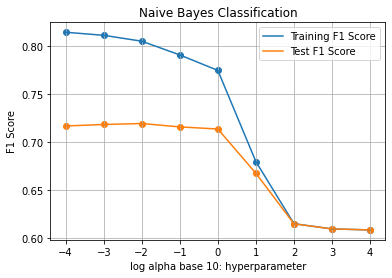

{'alpha': 0.01}
0.7194190991059074
best alpha log value
-2.0


In [ ]:

train_p= results['mean_train_score']

test_p = results['mean_test_score'] 

params =  [math.log10(x) for x in results['param_alpha'].values]

plt.plot(params, train_p, label='Training F1 Score')
plt.plot(params, test_p, label='Test F1 Score')
plt.scatter(params, train_p)
plt.scatter(params, test_p)

plt.legend()
plt.xlabel("log alpha base 10: hyperparameter")
plt.ylabel("F1 Score")
plt.title("Naive Bayes Classification")
plt.grid()
plt.show()

print(clf.best_params_)# pick the best alpha value
print(clf.best_score_)
print("best alpha log value")
a=math.log10(clf.best_params_.get('alpha'))
print(a)

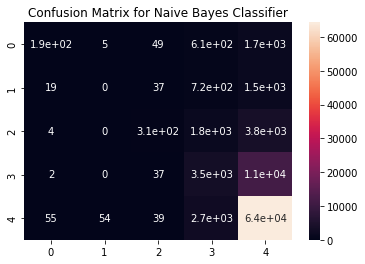

In [ ]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
best_nb=MultinomialNB(alpha=10)
best_nb.fit(train_cleanedtext, outputtrain)
predicted_nb=best_nb.predict(test_cleanedtext)
plt.title('Confusion Matrix for Naive Bayes Classifier')
sb.heatmap(confusion_matrix(outputtest,predicted_nb),annot=True)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
met=make_scorer(f1_score,average='weighted')
model_lr=LogisticRegression(solver='saga')
grid_lr={'C': [0.1, 1, 10],'penalty':['l1']}
grid_model=GridSearchCV(model_lr, param_grid = grid_lr,scoring = 'f1_weighted',cv=5)
grid_result=grid_model.fit(train_cleanedtext[:10000], outputtrain[:10000]) #fit the data
best_params=grid_result.best_params_ # best hyperparameters 
best_svr = LogisticRegression( C=best_params['C'],penalty='l1') #svc with optimal hyperparametrs
print('Best Hyperparameters are',best_params)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Best Hyperparameters are {'C': 10, 'penalty': 'l1'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.238001,0.311928,0.009604,0.003205,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.645175,0.649629,0.646841,0.630774,0.633179,0.641120,0.007638,3
1,69.953155,4.723009,0.006743,0.000231,1,l1,"{'C': 1, 'penalty': 'l1'}",0.671487,0.674382,0.671858,0.667951,0.658444,0.668824,0.005580,2
2,662.206178,18.852472,0.006848,0.000379,10,l1,"{'C': 10, 'penalty': 'l1'}",0.672103,0.680340,0.674813,0.664835,0.656416,0.669701,0.008310,1


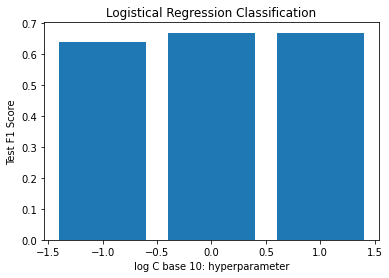

In [ ]:
results_lr = pd.DataFrame.from_dict(grid_model.cv_results_)

test_p_lr = results_lr['mean_test_score'] 
display(results_lr)
params_lr =  [math.log10(x) for x in results_lr['param_C'].values]

plt.bar(params_lr, test_p_lr)
plt.xlabel("log C base 10: hyperparameter")
plt.ylabel("Test F1 Score")
plt.title("Logistical Regression Classification")
plt.show()

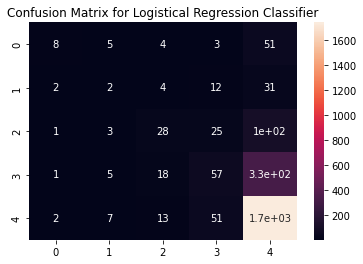

In [ ]:
predicted_lr=grid_model.predict(test_cleanedtext[:2500])
plt.title('Confusion Matrix for Logistical Regression Classifier')
sb.heatmap(confusion_matrix(outputtest[:2500],predicted_lr),annot=True)

In [ ]:
#best_lr=LogisticRegression(C=10,penalty='l1',solver='saga')
#best_lr.fit(train_cleanedtext[:10000], outputtrain[:10000])
#predicted_lr=best_lr.predict(test_cleanedtext[:2500])
#plt.title('Confusion Matrix for Logistical Regression Classifier')
#sb.heatmap(confusion_matrix(outputtest[:2500],predicted_nb),annot=True)

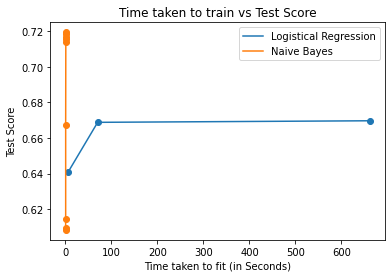

In [ ]:
plt.plot(results_lr['mean_fit_time'],results_lr['mean_test_score'],label='Logistical Regression')
plt.plot(results['mean_fit_time'],results['mean_test_score'],label='Naive Bayes')
plt.scatter(results_lr['mean_fit_time'],results_lr['mean_test_score'])
plt.scatter(results['mean_fit_time'],results['mean_test_score'])
plt.xlabel('Time taken to fit (in Seconds)')
plt.ylabel('Test Score')
plt.title('Time taken to train vs Test Score')
plt.legend()
plt.show()

LSTM Based text classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [ ]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [ ]:
df['reviewText']

0                           as advertised reasonably priced
1         like the oder and the feel when i put it on my...
2         i bought this to smell nice after i shave when...
3         hey i am an aqua velva man and absolutely love...
4         if you ever want to feel pampered by a shampoo...
                                ...                        
464320                                          perfect fit
464321                           my favorite cross trainers
464322                                love them fit perfect
464323    favorite nike shoe ever the flex sole is excel...
464324            i wear these everyday to work the gym etc
Name: reviewText, Length: 464077, dtype: object

In [ ]:
def get_sentiment(rating):
    if rating == 5 or rating == 4 or rating ==3:
        return 1
    else:
        return 0

In [ ]:
df['sentiment'] = df['overall'].apply(get_sentiment)
set(df['sentiment'])

{0, 1}

In [ ]:
X_train, X_tstval, y_train, y_tstval = train_test_split(df['reviewText'].tolist(),\
                                                      df['sentiment'].tolist(),\
                                                      test_size=0.3,\
                                                      stratify = df['sentiment'].tolist(),\
                                                      random_state=0)



In [ ]:
print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Val/Test data len:'+str(len(X_tstval)))
print('Class distribution'+ str(Counter(y_tstval)))

Train data len:324853
Class distributionCounter({1: 307900, 0: 16953})
Val/Test data len:139224
Class distributionCounter({1: 131958, 0: 7266})


In [ ]:
X_test, X_valid, y_test, y_valid = train_test_split(X_tstval, y_tstval, test_size = 0.5, random_state = 42 )

In [ ]:
num_words = 50000
tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)
print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[32283, 112, 23, 16]]


In [ ]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(X_test) )



x_train = pad_sequences(x_train, padding='post', maxlen=100)
x_valid = pad_sequences(x_valid, padding='post', maxlen=100)
x_test = pad_sequences(x_test, padding='post', maxlen=100)



train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(y_test)

print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

Train data len:324853
Class distributionCounter({1: 307900, 0: 16953})
Validation data len:69612
Class distributionCounter({1: 65948, 0: 3664})
Test data len:69612
Class distributionCounter({1: 66010, 0: 3602})


In [ ]:
max_features =50000
embedding_dim =16
sequence_length = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           800016    
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 100, 16)           2112      
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               819712    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

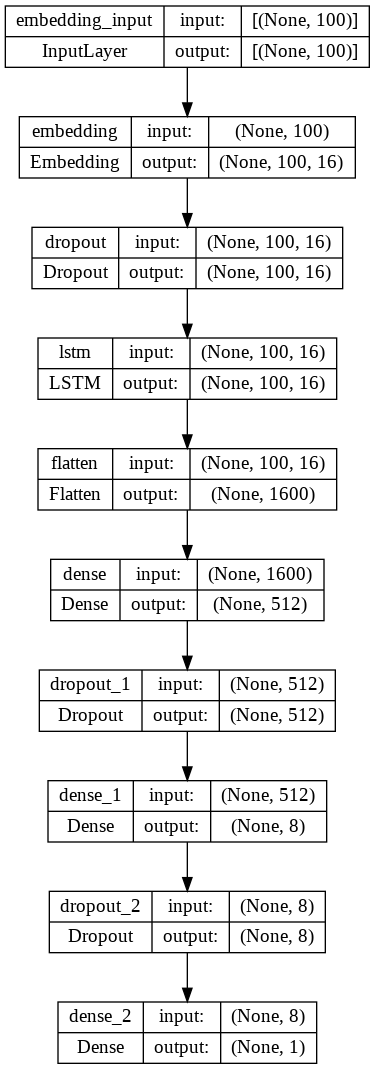

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
318/318 [==============================] - 128s 388ms/step - loss: 0.5436 - binary_accuracy: 0.9464 - val_loss: 0.2426 - val_binary_accuracy: 0.9474
Epoch 2/10
318/318 [==============================] - 147s 461ms/step - loss: 0.2456 - binary_accuracy: 0.9478 - val_loss: 0.2030 - val_binary_accuracy: 0.9474
Epoch 3/10
318/318 [==============================] - 140s 439ms/step - loss: 0.2246 - binary_accuracy: 0.9478 - val_loss: 0.2040 - val_binary_accuracy: 0.9474
Epoch 4/10
318/318 [==============================] - 125s 392ms/step - loss: 0.2123 - binary_accuracy: 0.9478 - val_loss: 0.1844 - val_binary_accuracy: 0.9474
Epoch 5/10
318/318 [==============================] - 123s 387ms/step - loss: 0.2018 - binary_accuracy: 0.9478 - val_loss: 0.1766 - val_binary_accuracy: 0.9474
Epoch 6/10
318/318 [==============================] - 123s 387ms/step - loss: 0.1971 - binary_accuracy: 0.9478 - val_loss: 0.1717 - val_binary_accuracy: 0.9474
Epoch 7/10
318/318 [====================

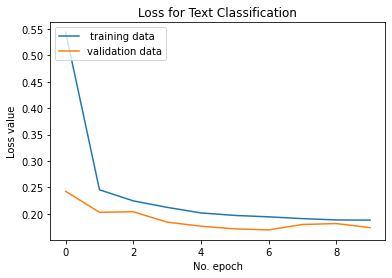

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

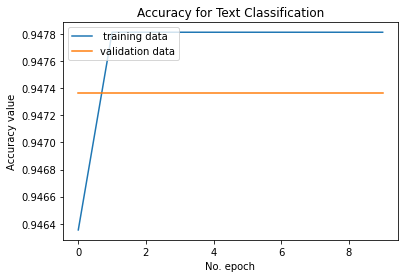

In [ ]:
plt.plot(history.history['binary_accuracy'], label=' training data')
plt.plot(history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
valid_predict= model.predict(x_valid)


2176/2176 [==============================] - 56s 26ms/step


In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
mpl.rcParams['figure.figsize'] = (16, 16)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

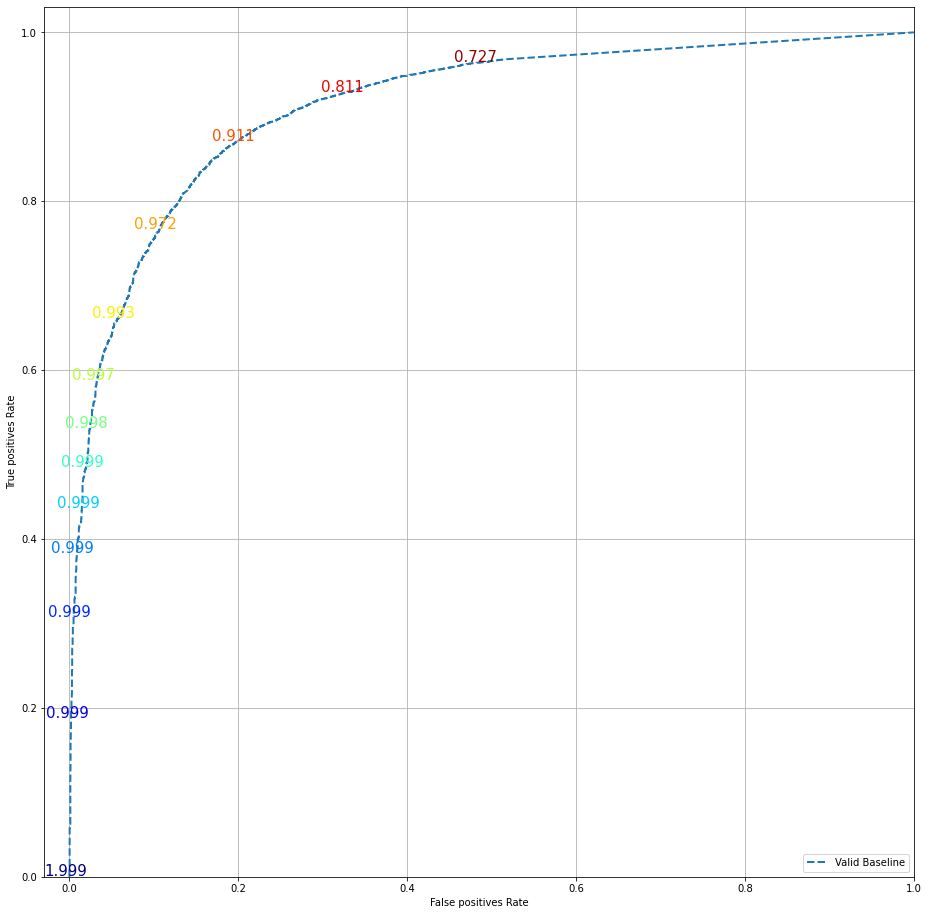

In [ ]:
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
x_test  = np.array( tokenizer.texts_to_sequences(X_test) )
x_test = pad_sequences(x_test, padding='post', maxlen=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:

print("Generate predictions for all samples")
predictions = model.predict(x_test)

Generate predictions for all samples
2176/2176 [==============================] - 56s 26ms/step


In [ ]:
labels = [0, 1]
print(classification_report(X_test,X_test,labels=labels))

References


*   https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
*   https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
* https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c
* https://medium.com/mlearning-ai/a-bow-vs-a-tfidf-feature-extractor-a-practical-application-on-a-na%C3%AFve-bayes-classifier-in-python-a68e8fb2248c
* 

